## 6.2 Численное решение задачи Коши

Написать программу для решения задачи Коши для произвольной системы ОДУ:

$$\begin{cases}
   \overline{\dot u_t} = \overline{f}(t, \overline{u}) \\
   \overline{u}(0) = \overline{u}_0
 \end{cases}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set()

In [2]:
def calc_newton_roots(t_n, u_n, h, eps):
        k1 = np.zeros(u0.shape[0])
        k2 = np.zeros(u0.shape[0])
        
        step = np.linalg.inv(jac(t_n + h * 0, u_n + h * k1 * 0) 
                             @ (0 * np.eye(u0.shape[0]))
                             - np.eye(u0.shape[0])) \
               @ (f(t_n + h * 0, u_n + h * k1 * 0) - k1) 
        while np.max(np.abs(step)) > eps:
            k1 = k1 - step
            step = np.linalg.inv(jac(t_n + h * 0, u_n + h * k1 * 0) 
                             @ (0 * np.eye(u0.shape[0]))
                             - np.eye(u0.shape[0])) \
               @ (f(t_n + h * 0, u_n + h * k1 * 0) - k1) 
        step = np.linalg.inv(jac(t_n + 1 * h, u_n + h * (k1 / 2 + k2 / 2)) 
                             @ (h / 2 * np.eye(u0.shape[0])) 
                             - np.eye(u0.shape[0])) \
                @ (f(t_n + 1 * h, u_n + h * (k1 / 2 + k2 / 2)) - k2)
        
        while np.max(np.abs(step)) > eps:
            k2 = k2 - step
            step = np.linalg.inv(jac(t_n + 1 * h, u_n + h * (k1 / 2 + k2 / 2)) 
                             @ (h / 2 * np.eye(u0.shape[0])) 
                             - np.eye(u0.shape[0])) \
                @ (f(t_n + 1 * h, u_n + h * (k1 / 2 + k2 / 2)) - k2)
        return k1, k2

def cauchy_solution(T, u0, f, jac, N, eps):
    h = T / N
    t = 0
    u = [u0]

    for i in range(1, N + 1):
        k_1, k_2 = calc_newton_roots(t, u[i - 1], h, eps)
        u_i = u[i - 1] + h * (k_1 + k_2) / 2
        u.append(u_i)
        t += h
        
    return np.array(u)                            

## Пример

В качестве примера решим диференциальное уравнение:
    $$
    \begin{cases}
   \dot x = x + y + 5t + 1 \\
   \dot y = -8x - y + 6t + 3
     \end{cases}
    $$
При условии: $x(0) = 0, y(0) = 0$.

In [3]:
f = lambda t, x : np.array([x[0] + x[1] + 5*t + 1, -8*x[0] - x[1] + 6*t + 3])
jac = lambda t, x : np.array([[1, 1], [-8, -1]])
u0 = np.array([0, 0])

T = 10
steps = 70
tol = 1e-7

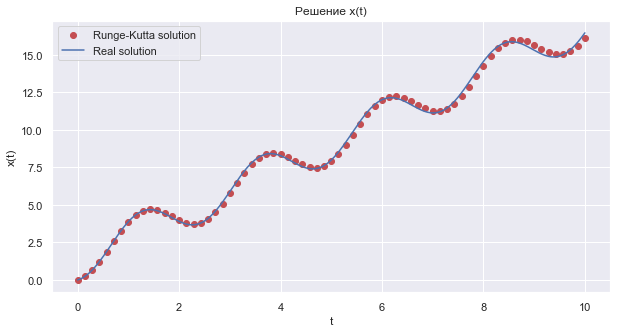

In [4]:
u = cauchy_solution(T, u0, f, jac, steps, tol)
h = np.linspace(0, T, steps + 1)

plt.figure(figsize=(10,5))
plt.plot(h, u[:,0], 'ro', label="Runge-Kutta solution")
xx = np.linspace(0, T, 10000)

sol = lambda x : 1/49 * (77*x -4*(7**(1./2))*np.sin(7**(1./2) * x) - 63*np.cos(7**(1./2) *x) + 63)
plt.plot(xx, sol(xx), label="Real solution")
plt.xlabel('t')
plt.ylabel("x(t)")
plt.title('Решение x(t)')
plt.legend()

Построим график зависимости ошибки от шага сетки в логарифмическом масштабе 

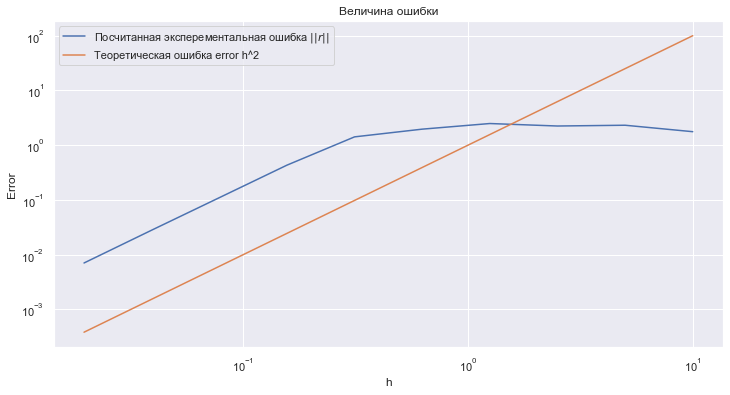

In [5]:
N = 10

error = []
steps = []
for i in range(N):
    step = 2**i
    u = cauchy_solution(T, u0, f, jac, step, tol)
    error.append(np.linalg.norm(u[:,0] - sol(np.linspace(0, T, 2**i + 1)), np.inf))
    steps.append(T / 2**i)
error = np.array(error)
steps = np.array(steps)

plt.figure(figsize=(12, 6))
plt.loglog(steps, error, label=r"Посчитанная эксперементальная ошибка $|| r ||$")
plt.loglog(steps, steps**2, label=r"Теоретическая ошибка error h^2")
plt.title('Величина ошибки')
plt.xlabel('h')
plt.ylabel('Error')

plt.legend()

P.S решение находим с помощью запроса в Wolfram Alpha:
    
    solve x' = x + y + 5*t + 1, y'= -8*x - y + 6*t + 3, x(0) = 0, y(0) = 0